In Lecture 4 of MCS 471, we distinguish between forward and backward error.  Condition numbers are defined.

# 1. Multiple Roots

In [1]:
p(x) = (x-3/2)^3

p (generic function with 1 method)

In [2]:
using Plots

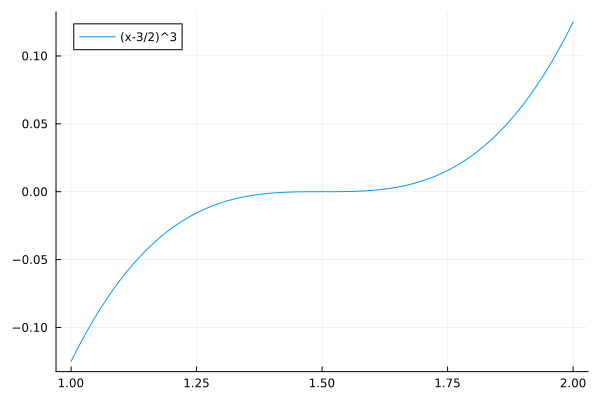

In [3]:
plot(p, 1:0.01:2, label="(x-3/2)^3")

That 3/2 is a triple root of p can be observed by the flatness of the graph of p around 1.5.

Consider now a polynomial with three single roots, close to 1.5.

In [4]:
q(x) = (x - 1.51)*(x - 1.5)*(x - 1.49)

q (generic function with 1 method)

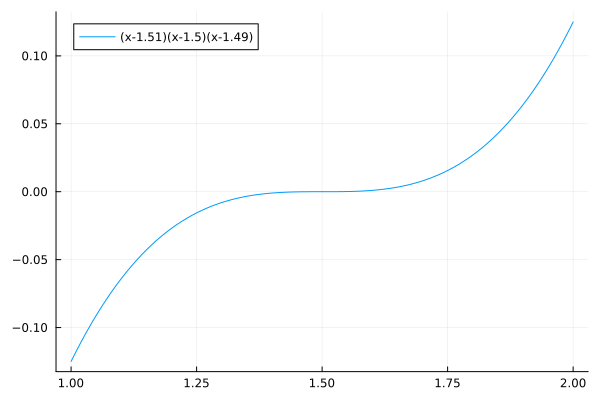

In [5]:
plot(q, 1:0.01:2, label="(x-1.51)(x-1.5)(x-1.49)")

Although q has three single roots, on the plot we observe the same flatness as we did with p, around the x = 1.5.

# 2. Forward and Backward Errors

For any problem, the forward error is the error on the output.  The backward error is the error on the input.

The *forward error* between the roots of $p$ and $q$ is 0.01, as |1.51 - 1.5| = 0.01 = |1.49 - 1.5|.

The *backward error* between $p$ and $q$ is the distance between the coefficient vectors.
This distance we will compute using the package ``Polynomials``.

In [7]:
using Polynomials

In [8]:
P = fromroots([1.5, 1.5, 1.5])

Polynomial(-3.375 + 6.75*x - 4.5*x^2 + 1.0*x^3)

Observe the difference between ``P`` and the ``p(x)`` we defined earlier.

In [10]:
Q = fromroots([1.51, 1.5, 1.49])

Polynomial(-3.3748500000000003 + 6.7499*x - 4.5*x^2 + 1.0*x^3)

In [11]:
d = P - Q

Polynomial(-0.0001499999999996504 + 9.999999999976694e-5*x)

In [12]:
degree(d)

1

In [13]:
cffd = [d[k] for k in 0:degree(d)]

2-element Vector{Float64}:
 -0.0001499999999996504
  9.999999999976694e-5

To measure the backward error, we add up the sum of the differences between the coefficients.

In [14]:
E = sum([abs(c) for c in cffd])

0.00024999999999941735

The forward error is $0.01 = 10^{-2}$ which is much larger than the backward error $2.5 \times 10^{-4}$.

If we make an error of $10^{-4}$ on the polynomial, then the error on the root is $10^{-2}$.

This implies that, if we have only three decimal places of precision to evaluate the polynomials, then $p$ and $q$ are indistinguishable from each other.

# 3. The Wilkinson Polynomial

The Wilkinson polynomial is defined as

$$
   w = \prod_{r=1}^{20} ( x - r ).
$$

In [15]:
roots = [r for r in 1:20]

20-element Vector{Int64}:
  1
  2
  3
  4
  5
  6
  7
  8
  9
 10
 11
 12
 13
 14
 15
 16
 17
 18
 19
 20

In [16]:
w = fromroots(roots)

Polynomial(2432902008176640000 - 8752948036761600000*x - 4642984320068847616*x^2 + 5575812828558562816*x^3 + 8037811822645051776*x^4 - 3599979517947607200*x^5 + 1206647803780373360*x^6 - 311333643161390640*x^7 + 63030812099294896*x^8 - 10142299865511450*x^9 + 1307535010540395*x^10 - 135585182899530*x^11 + 11310276995381*x^12 - 756111184500*x^13 + 40171771630*x^14 - 1672280820*x^15 + 53327946*x^16 - 1256850*x^17 + 20615*x^18 - 210*x^19 + x^20)

The large coefficients are a concern.

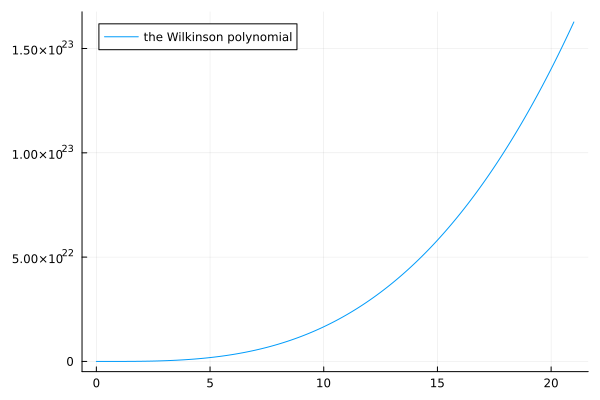

In [17]:
xr = 0:0.01:21
yw = [w(x) for x in xr]
plot(xr,yw,label="the Wilkinson polynomial",legend=:topleft)

In [18]:
savefig("figwilkinson20plot.png")

"/Users/ales/Documents/Programación_general/Julia/Cursos/analisis_numerico_301/calculo_raices_L3_L4/condicionamiento_numerico_L4/figwilkinson20plot.png"

In [19]:
w(15)

0

In [20]:
w(15.0)

5.810724383218119e22